In [2]:
"""
Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality    
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


In [3]:
# Reading the data
df = pd.read_csv('winequality-white.csv',delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Initial data analysis

In [4]:
# Basic info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Describe the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


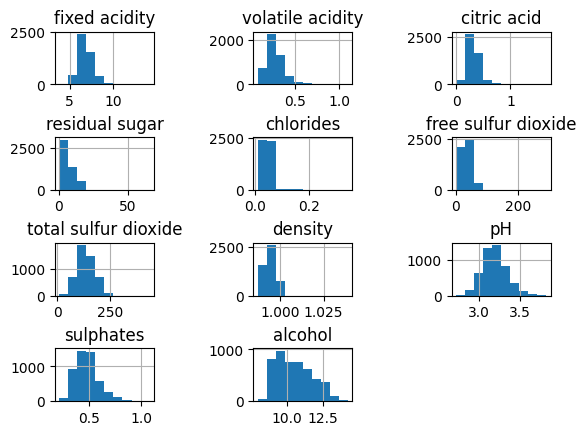

In [22]:
df.hist()
plt.subplots_adjust(hspace=1,wspace=1)  # change the spacing between the subplots

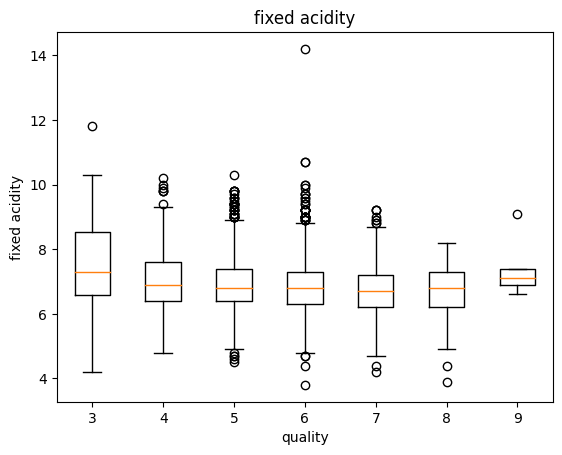

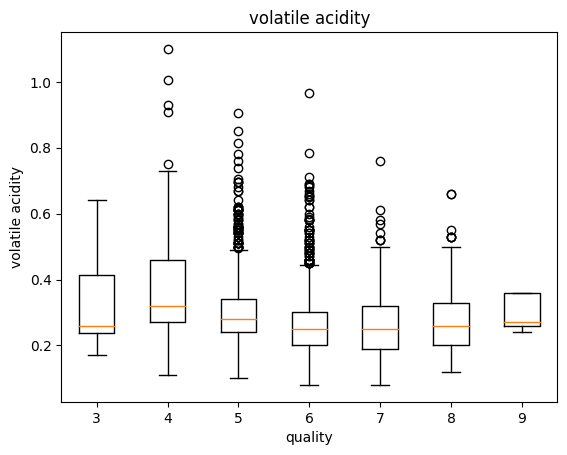

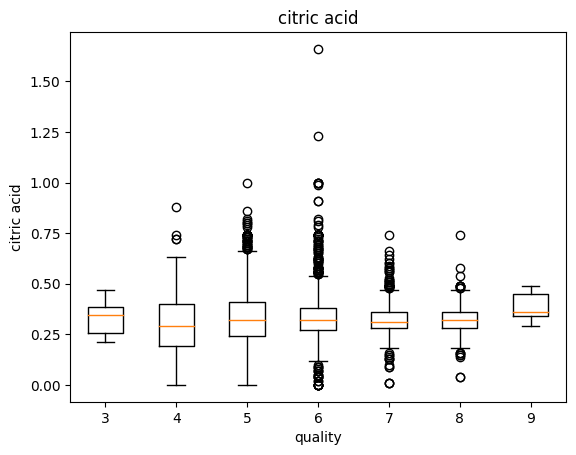

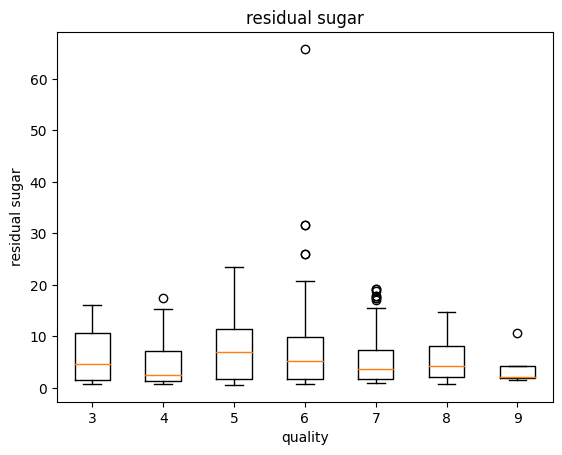

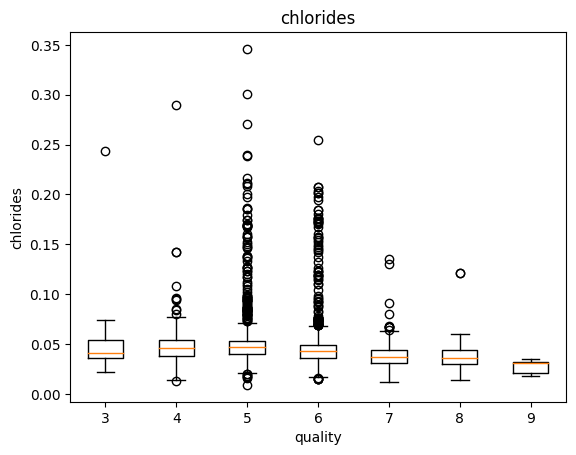

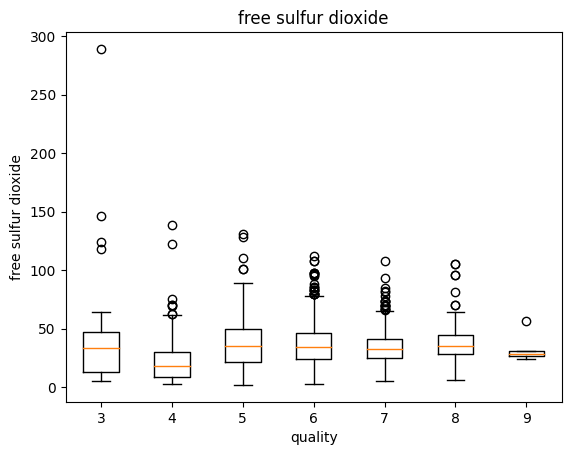

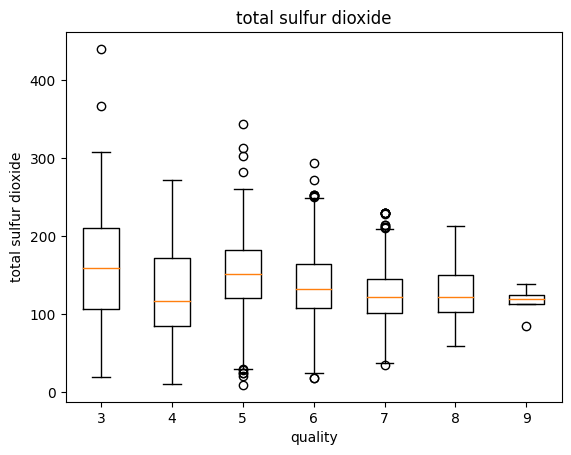

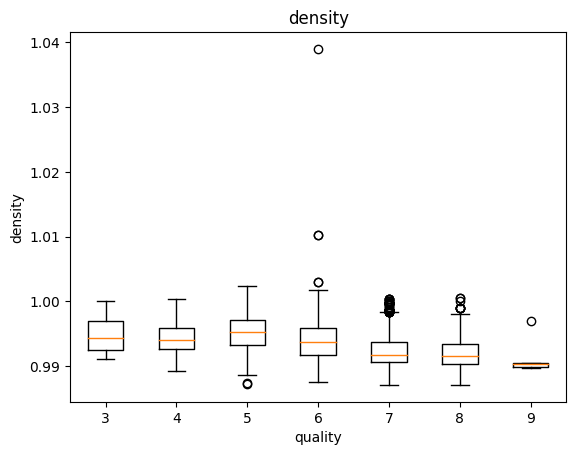

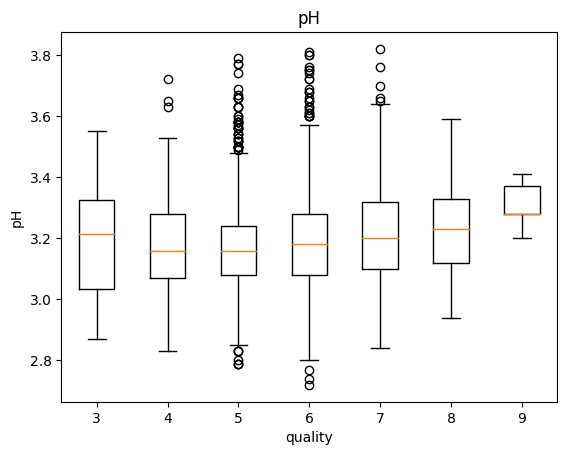

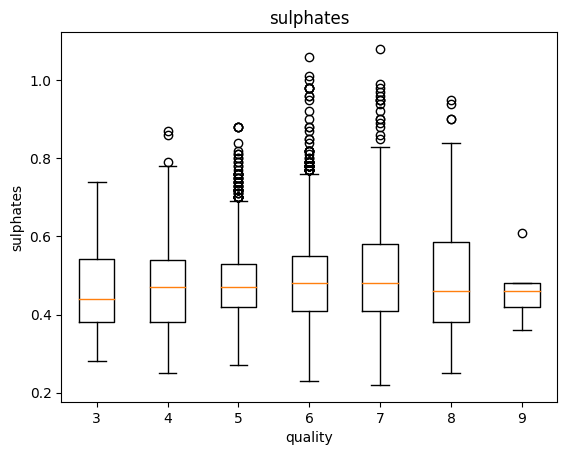

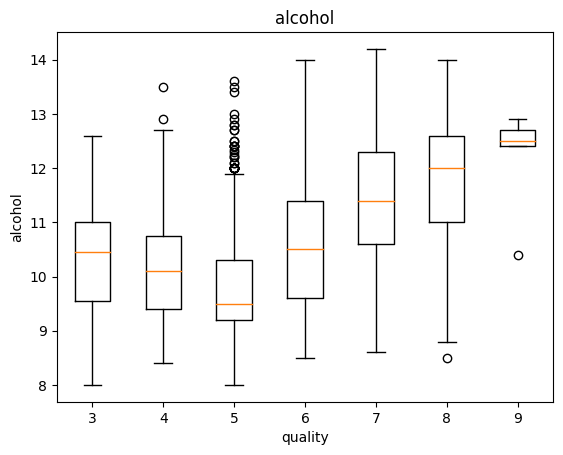

In [6]:
# Boxplot
for label in df.columns[:-1]: # exlude the last column'qaulity'
    plt.boxplot([df[df['quality']==i][label] for i in range(df['quality'].min(),df['quality'].max()+1)],positions=range(df['quality'].min(),df['quality'].max()+1))
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()

<AxesSubplot: >

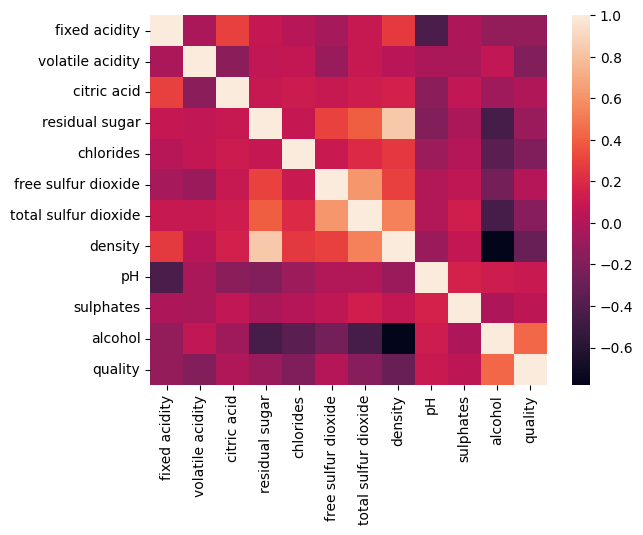

In [7]:
# Correlation plot
sns.heatmap(df.corr())

In [8]:
correlation_matrix = df.corr()
correlation_matrix["quality"]

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

# Gathering the training and testing data

In [9]:
# Since the quality numbers 3-8 don't really mean much, lets map these to low(0), mid(1), and high(2)
# Separate data into 3 bins of (0,5] , (5,7] , (7,10]:
bins = [0, 5, 7, 10] # this means 3-5 are low(0), 5-7 are mid(1), 7-8 are high(2)
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [10]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [11]:
x = df.iloc[:,:-1] # df[df.columns[:-1]]
y = df['quality']

# normalize the features INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [12]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2486
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      592
Name: quality, dtype: int64


# 1. K Nearest Neighbors Classifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
test_preds = knn_model.predict(x_test)
print('on test set:')
print(classification_report(y_test, test_preds))

print('on all train set:')
scores = cross_val_score(estimator=knn_model, X=x_train, y=y_train, cv=10)
print(scores.mean())

on test set:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       355
           1       0.75      0.82      0.78       592
           2       0.36      0.15      0.21        33

    accuracy                           0.72       980
   macro avg       0.59      0.52      0.54       980
weighted avg       0.71      0.72      0.71       980

on all train set:
0.7202691946343756


# Tune and Optimize kNN
 
 The best value for k is something that you need to find empirically for each dataset.

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)} # prepare a range of values of hyperparameter K from 1 to 50 that will be used by GridSearchCV to find the best value of K.
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [15]:
test_preds = gridsearch.predict(x_test)
print('on test set:')
print(classification_report(y_test, test_preds))

on test set:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       355
           1       0.79      0.83      0.81       592
           2       0.35      0.33      0.34        33

    accuracy                           0.76       980
   macro avg       0.63      0.62      0.62       980
weighted avg       0.76      0.76      0.76       980



# Plotting a Confusion Matrix

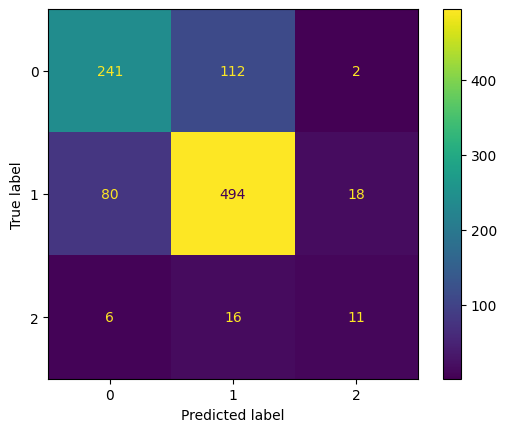

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 2. Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
test_preds = rf.predict(x_test)
print('on test set:')
print(classification_report(y_test, test_preds))

print('on all train set:')
scores = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(scores.mean())

on test set:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       355
           1       0.79      0.90      0.84       592
           2       0.88      0.21      0.34        33

    accuracy                           0.80       980
   macro avg       0.82      0.60      0.64       980
weighted avg       0.80      0.80      0.79       980

on all train set:
0.8203142126415784


# 3. Decision Tree Classifier

In [18]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(x_train, y_train)
test_preds = tree_model.predict(x_test)
print('on test set:')
print(classification_report(y_test, test_preds))

print('on all train set:')
scores = cross_val_score(estimator=tree_model, X=x_train, y=y_train, cv=10)
print(scores.mean())

on test set:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       355
           1       0.75      0.78      0.76       592
           2       0.22      0.27      0.24        33

    accuracy                           0.70       980
   macro avg       0.55      0.55      0.55       980
weighted avg       0.70      0.70      0.70       980

on all train set:
0.749621587765541


# 4. Stochastic Gradient Descent

In [19]:
sgd = SGDClassifier(random_state=0)
sgd.fit(x_train, y_train)
test_preds = sgd.predict(x_test)
print('on test set:')
print(classification_report(y_test, test_preds))

print('on all train set:')
scores = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(scores.mean())

on test set:
              precision    recall  f1-score   support

           0       0.77      0.34      0.47       355
           1       0.67      0.94      0.79       592
           2       0.00      0.00      0.00        33

    accuracy                           0.69       980
   macro avg       0.48      0.43      0.42       980
weighted avg       0.69      0.69      0.64       980

on all train set:
0.7016213006941907


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Trying to improve results
Ref: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [200]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42,n_jobs = -1)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       148
           1       0.82      0.83      0.82       169
           2       0.00      0.00      0.00         3

    accuracy                           0.81       320
   macro avg       0.54      0.55      0.54       320
weighted avg       0.80      0.81      0.81       320



/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [197]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       148
           1       0.82      0.82      0.82       169
           2       0.00      0.00      0.00         3

    accuracy                           0.81       320
   macro avg       0.54      0.55      0.54       320
weighted avg       0.80      0.81      0.81       320

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 43, 'bootstrap': False}


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [216]:
rfeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
rfeval.mean()

0.7873646653543307

In [199]:
rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=None, bootstrap=True)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(rf_optimized, X=x_train, y=y_train, cv=10)
rfeval.mean()

/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

0.7897268700787402